## B1


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
data=np.random.rand(20,3)

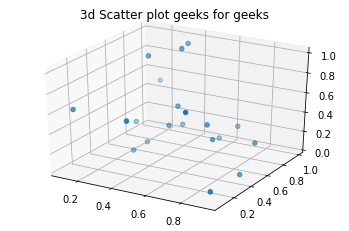

In [74]:
def show_data(Data):
    fig = plt.figure()
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    ax.scatter(Data.T[0], Data.T[1], Data.T[2])
    ax.set_title('3d Scatter plot geeks for geeks')
    plt.show()
show_data(data)

In [75]:
mean=data.mean()
sigma=np.std(data)

In [76]:
data = data - data.mean(axis=0) # Center data points

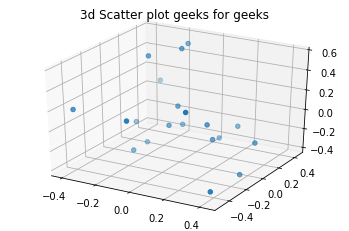

In [77]:
show_data(data)

In [78]:
cov = np.cov(data.T) / data.shape[0] 
v, w = np.linalg.eig(cov)

In [79]:
idx = v.argsort()[::-1] # Sort descending and get sorted indices
v = v[idx] # Use indices on eigv vector
w = w[:,idx] # 


In [80]:
z=data.dot(w[:, :2])

In [81]:
def change(Z):
    z2=[]
    for i in range(Z.shape[0]):
        z1=(Z[i]*sigma+mean)
        z2.append(z1)
    return z2
tran=np.array(change(z))

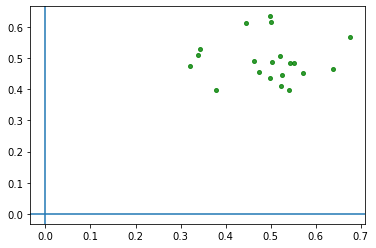

In [82]:
def projected_data(X):
   
    plt.plot(X[:,0], X[:,1], 'go', markersize = 4, alpha = .8)
    plt.axvline(x=0, ymin=0, ymax=1, lw=1.5, label='boudary')
    plt.axhline(y=0, xmin=0, xmax=1, lw=1.5)
    plt.show()

projected_data(tran.real)

## B2

In [167]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [168]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df.loc[:, features].values

In [169]:
data = X - X.mean(axis=0)

In [170]:
cov = np.cov(data.T) / data.shape[0] 
v, w = np.linalg.eig(cov)

In [171]:
idx = v.argsort()[::-1] # Sort descending and get sorted indices
v = v[idx] # Use indices on eigv vector
w = w[:,idx]  

In [174]:
z=data.dot(w[:, :2])

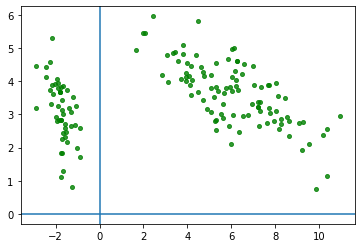

In [175]:
tran=np.array(change(z))
projected_data(tran)

# B3

In [176]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [177]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values


In [178]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

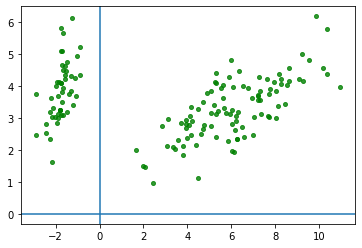

In [179]:
tran=np.array(change(principalComponents))
projected_data(tran)